In [1]:
from neuralhydrology.datasetzoo.camelsde import load_camels_de_attributes
from neuralhydrology.datasetzoo.camelsde import load_camels_de_timeseries
from neuralhydrology.datasetzoo.camelsde import CamelsDE
from pathlib import Path
import os
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams["grid.color"] = "#eeeeee"
mpl.rcParams["grid.linewidth"] = 0.5
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams.update({'font.size': 11})

In [3]:
data_dir = Path('../data/camels_de/')

In [4]:
df_attributes = load_camels_de_attributes(data_dir)

## Print all static inputs of the dataset

In [ ]:
# print every single column
for col in df_attributes.columns:
    print(col)

## Plot discharge data of all 5 reservoir inflows in the Harz

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set data directory
data_dir = Path('../data/camels_de/')

# List of basin IDs
basin_ids = ['DE1', 'DE2', 'DE3', 'DE4', 'DE5']

# create mapping
basin_id_mapping = {
    'DE1': 'innerste_reservoir_catchment',
    'DE2': 'oker_reservoir_catchment',
    'DE3': 'ecker_reservoir_catchment',
    'DE4': 'soese_reservoir_catchment',
    'DE5': 'grane_reservoir_catchment'
}

for basin_id in basin_ids:
    # Load the discharge data for the current basin
    df_discharge = load_camels_de_timeseries(data_dir, basin=basin_id)
    
    # Plot the discharge data
    df_discharge['discharge_vol'].plot()

    # Add labels to the x and y axes
    plt.xlabel('Date')
    plt.ylabel('Discharge (m³/s)')

    # Add a title to the plot
    plt.title(f'Discharge for basin {basin_id_mapping[basin_id]}')

    # Display the plot
    plt.show()

## Print dynamic inputs

In [ ]:
for col in df_discharge.columns:
    print(col)

## Print catchments map

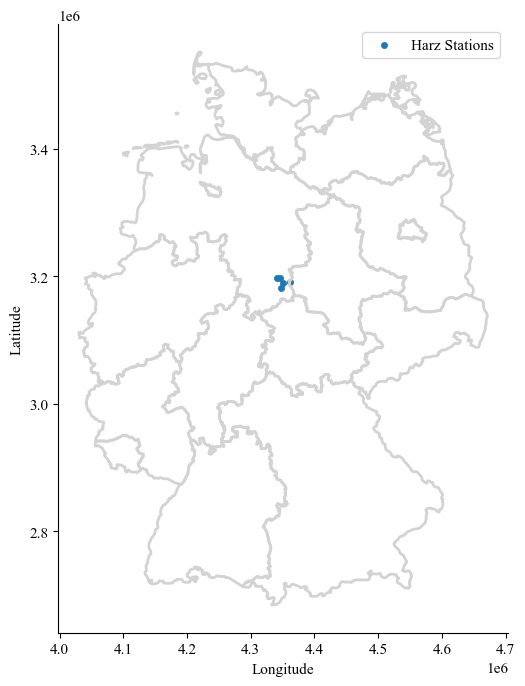

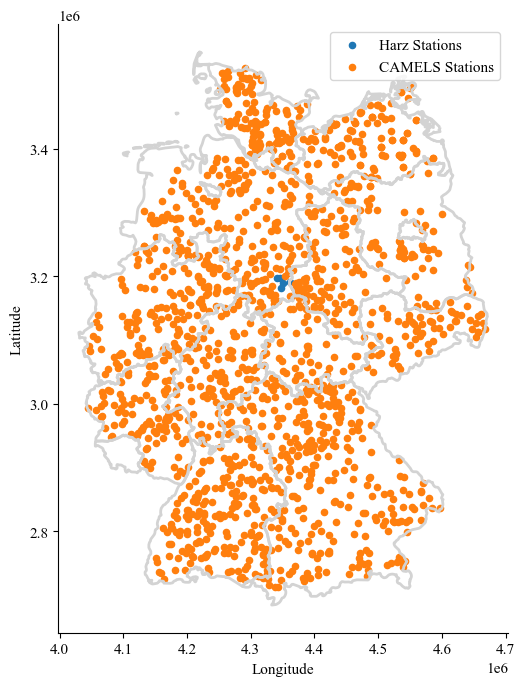

In [34]:
# CAMELS gauging stations
camels_stations_path = data_dir / 'CAMELS_DE_catchment_boundaries/gauging_stations/CAMELS_DE_gauging_stations.shp'
gdf_camels = gpd.read_file(camels_stations_path)

# Harz catchments
harz_path = data_dir / 'CAMELS_DE_catchment_boundaries/gauging_stations/HARZ_gauging_stations.shp'
gdf_harz = gpd.read_file(harz_path)
gdf_harz = gdf_harz.to_crs(gdf_camels.crs)

# State boundaries
states_path = data_dir / 'CAMELS_DE_catchment_boundaries/state_boundaries/de.shp'
gdf_states = gpd.read_file(states_path)
gdf_states = gdf_states.to_crs(gdf_camels.crs)

# Plot 1: Harz gauging stations and with zoom to the catchments
fig, ax = plt.subplots(figsize=(7, 7))
gdf_states.boundary.plot(ax=ax, color='lightgrey', linewidth=2)
gdf_harz.plot(ax=ax, linewidth=0.5, marker='o', markersize=20, label='Harz Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('harz_stations_plot.png', dpi=300)  # Save the plot
plt.show()

# Plot 2: Both Harz and CAMELS gauging stations
fig, ax = plt.subplots(figsize=(7, 7))
gdf_states.boundary.plot(ax=ax, color='lightgrey', linewidth=2)
gdf_harz.plot(ax=ax, marker='o', markersize=20, label='Harz Stations')
gdf_camels.plot(ax=ax, marker='o', markersize=20, label='CAMELS Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()
plt.savefig('harz_and_camels_stations_plot.png', dpi=300)  # Save the plot
plt.show()

In [9]:
import pandas as pd

In [15]:
# First, create the new gauge_id and gauge_name columns in gdf_harz
gdf_harz['gauge_id'] = ['DE' + str(i) for i in range(len(gdf_harz))]
gdf_harz['gauge_name'] = gdf_harz['Location']

# Select only the necessary columns (gauge_id, gauge_name, geometry) from gdf_harz
gdf_harz_cleaned = gdf_harz[['gauge_id', 'gauge_name', 'geometry']]

# Now concatenate gdf_camels with gdf_harz_cleaned
gdf_combined = gpd.GeoDataFrame(pd.concat([gdf_camels, gdf_harz_cleaned], ignore_index=True))

In [17]:
# read climate data stored under:
# data/camels_de/CAMELS_DE_climatic_attributes.csv
df_climate = pd.read_csv(data_dir / 'CAMELS_DE_climatic_attributes.csv', index_col=0)


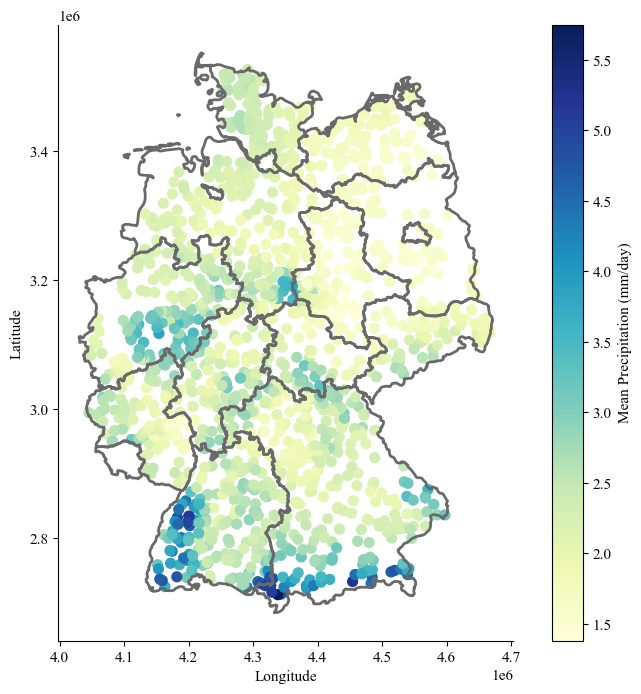

In [33]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Reset the index without adding it as a new column
df_climate = df_climate.reset_index(drop=True)

# Merge the combined GeoDataFrame with df_climate on 'gauge_id'
gdf_combined_with_climate = gdf_combined.merge(df_climate[['gauge_id', 'p_mean']], on='gauge_id', how='left')

# Plot the data
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the points, color-coded by p_mean
gdf_combined_with_climate.plot(column='p_mean', cmap='YlGnBu', legend=True, 
                               ax=ax, markersize=50,
                               legend_kwds={'label': "Mean Precipitation (mm/day)",
                                            'orientation': "vertical"})

# Add state boundaries
gdf_states.boundary.plot(ax=ax, color='dimgray', linewidth=2)

# Set plot title and labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# sabe figure as high res png
plt.savefig('precipitation_map.png', dpi=300)

# Show the plot
plt.show()

## DE1 - Train/Val/Test Distribution
train_start_date: "01/11/1963"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE2 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE3 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE4 - Train/Val/Test Distribution
train_start_date: "01/01/1951"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"

## DE5 - Train/Val/Test Distribution
train_start_date: "01/11/1979"
train_end_date: "30/09/2015"
validation_start_date: "01/10/2015"
validation_end_date: "30/09/2018"
test_start_date: "01/10/2018"
test_end_date: "31/12/2020"